In [114]:
import os

WDIR = '/Users/danielhasegan/workspace/netpyne-project/results/20210629-longrun'

evaluations = [(os.path.join(WDIR, fname), int(fname.replace('evaluation_', ''))) for fname in os.listdir(WDIR) if fname.startswith('evaluation_')]

In [115]:
import csv

results = {}
for eval_dir, eval_ts in evaluations:
    if os.path.isfile(os.path.join(eval_dir, 'ActionsPerEpisode.txt')):
        with open(os.path.join(eval_dir, 'ActionsPerEpisode.txt')) as f:
            results[eval_ts] = [int(float(eps)) for _,eps in csv.reader(f, delimiter='\t')]

In [116]:
import pickle as pkl

with open(os.path.join(WDIR, 'synWeights.pkl'), 'br') as f:
    synWeights = pkl.load(f)
    
preid = list(synWeights.keys())[0]
postid = list(synWeights[preid].keys())[0]

steps = len(synWeights[preid][postid])
ts = [s for s,v in synWeights[preid][postid]]

In [117]:
sorted_results = sorted(list(results.items()), key=lambda x:x[0])

labels = [k for k,v in sorted_results]
data = [v for k,v in sorted_results]

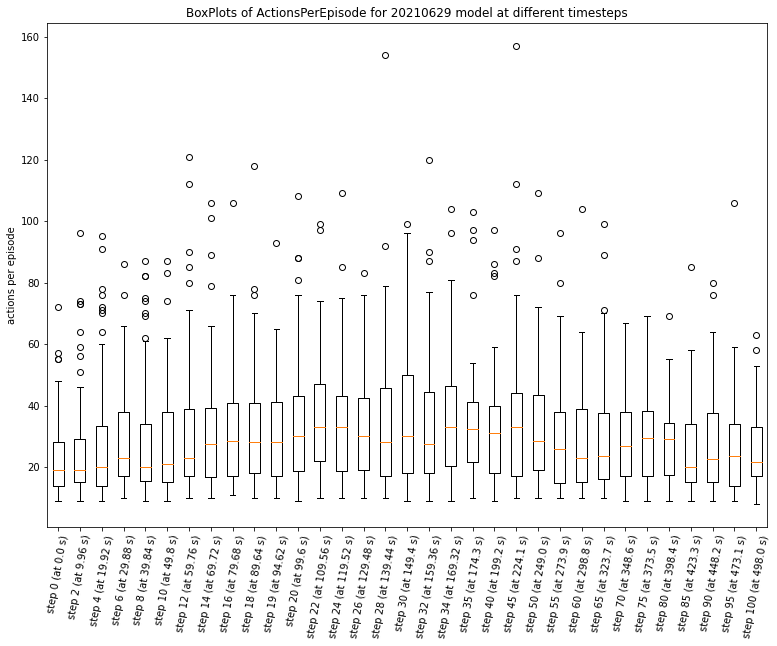

In [118]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)

ax.set_xticklabels(
    ['step {} (at {} s)'.format(l, round(ts[l] / 1000, 4)) for l in labels],
    rotation = 80)

ax.set_ylabel('actions per episode')

ax.set_title('BoxPlots of ActionsPerEpisode for 20210629 model at different timesteps')

# show plot
plt.show()

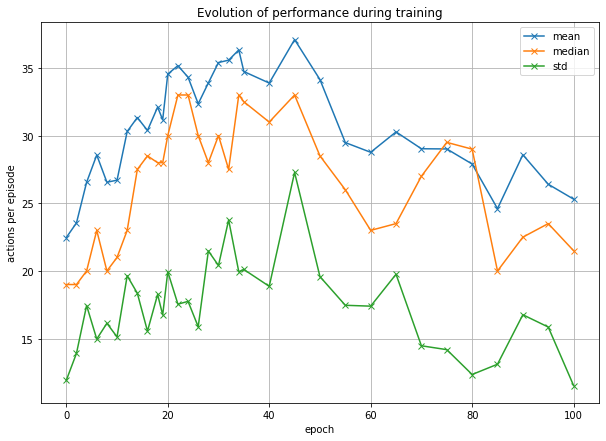

In [119]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))

data = [(step_ts, acts_per_eps) for step_ts, acts_per_eps in results.items()]
data = sorted(data, key=lambda x:x[0])
 
plt.plot([x for x,y in data], [np.mean(y) for x,y in data], '-x')
plt.plot([x for x,y in data], [np.median(y) for x,y in data], '-x')
plt.plot([x for x,y in data], [np.std(y) for x,y in data], '-x')

plt.legend(['mean', 'median', 'std'])

plt.xlabel('epoch')
plt.ylabel('actions per episode')
plt.title('Evolution of performance during training')

plt.grid()
plt.show()

In [80]:
import numpy as np


with open(os.path.join(WDIR, 'ActionsPerEpisode.txt')) as f:
    training_results = [int(float(eps)) for _,eps in csv.reader(f, delimiter='\t')]

training_medians = {}
for STEP in [21, 51, 101]:
    training_medians[STEP] = []
    for idx in range(len(training_results) - STEP):
        training_medians[STEP].append(np.median(training_results[idx:idx+STEP]))



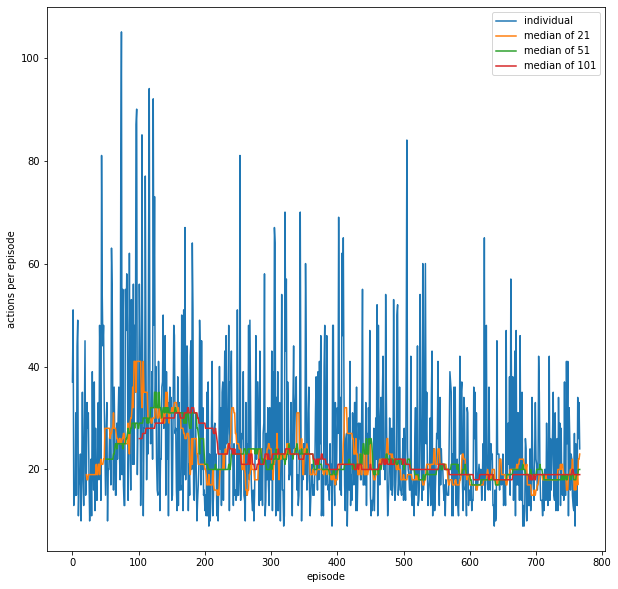

In [81]:
plt.figure(figsize=(10,10))

plt.plot(list(range(len(training_results))), training_results)

for STEP, medians in training_medians.items():
    plt.plot([t + STEP for t in range(len(medians))], medians)

plt.legend(['individual'] + ['median of {}'.format(STEP) for STEP in training_medians.keys()])

plt.xlabel('episode')
plt.ylabel('actions per episode')

plt.show()

In [51]:
tm = np.array(training_medians) 

first_index = np.where(tm == np.amax(tm))[0][0]

In [66]:
times = [training_results[i] for i in range(first_index)]
cumulative = sum(times)
cumulative += len(times)

print(times)
print(cumulative)

[37, 51, 13, 15, 15, 31, 15, 44, 49, 11, 17, 18, 23, 10, 19, 35, 19, 13, 29, 45, 15, 18, 33, 28, 31, 19, 10, 15, 22, 11, 39, 21, 16, 37, 12, 28, 17, 14, 22, 33, 18, 48, 38, 14, 81, 54, 44, 48, 33, 24, 15, 28, 33, 10, 20, 20, 26, 27, 17, 63, 55, 31, 16, 36, 25, 15, 15, 29, 22, 30, 36, 23]
2016


In [67]:
cumulative * 50 / 1000

100.8